<a href="https://colab.research.google.com/github/a-v-kolos/Allen_dataset_neuromatch_2025/blob/justyna_wi%C5%9Bniewska/Kopia_notatnika_Allen_Visual_Behavior_Working_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Institute Visual Behavior 2P dataset overview
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
##### In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.


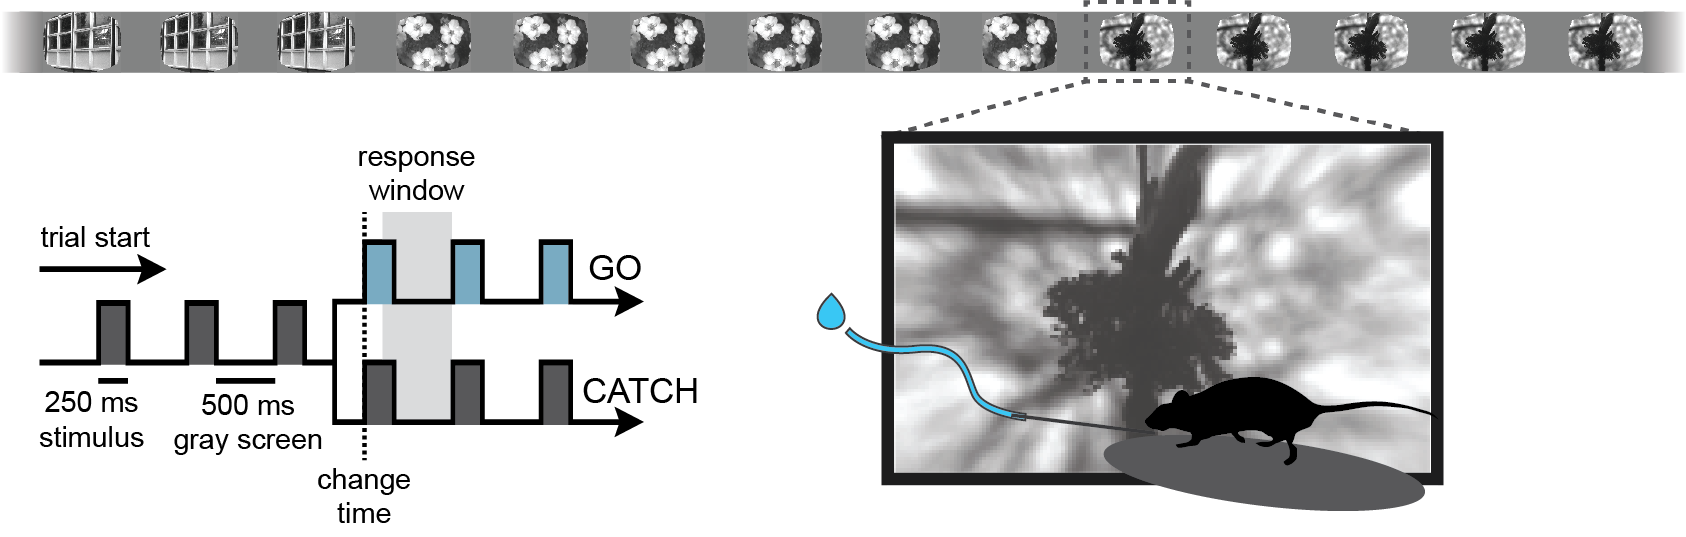

##### In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images.
##### During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.


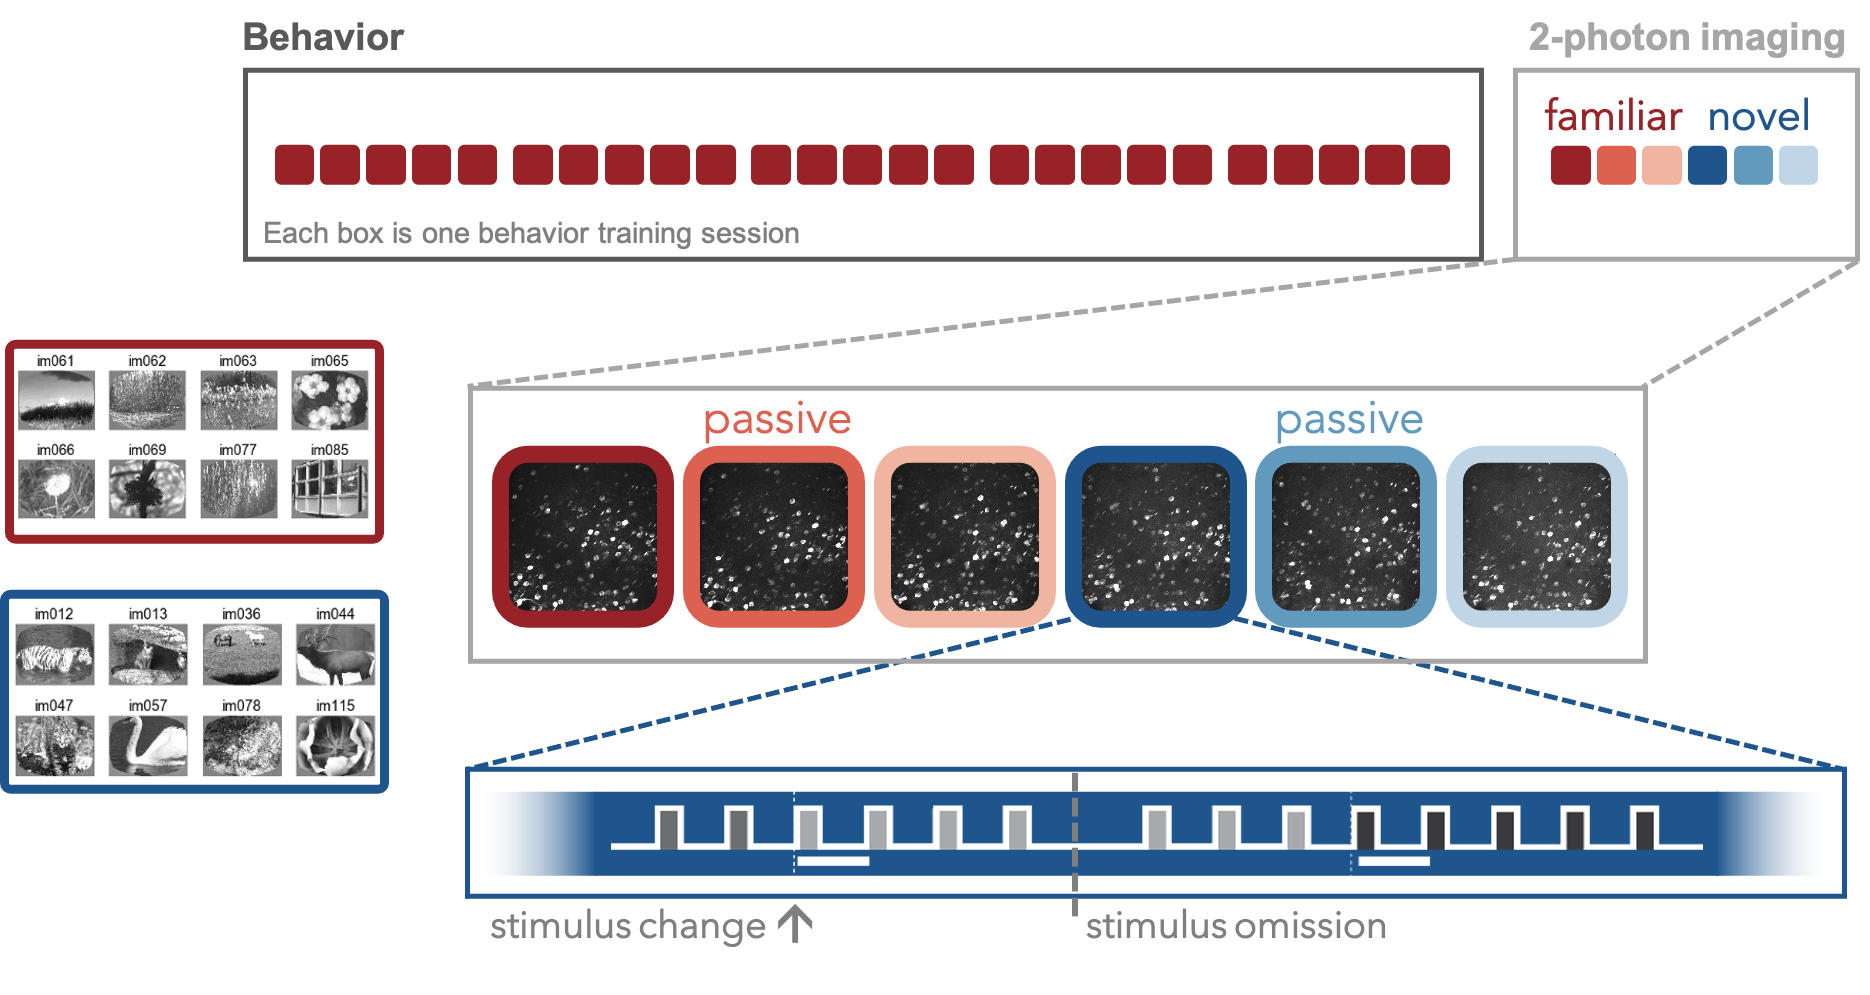

##### Multiple cortical areas and depths were measured concurrently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.

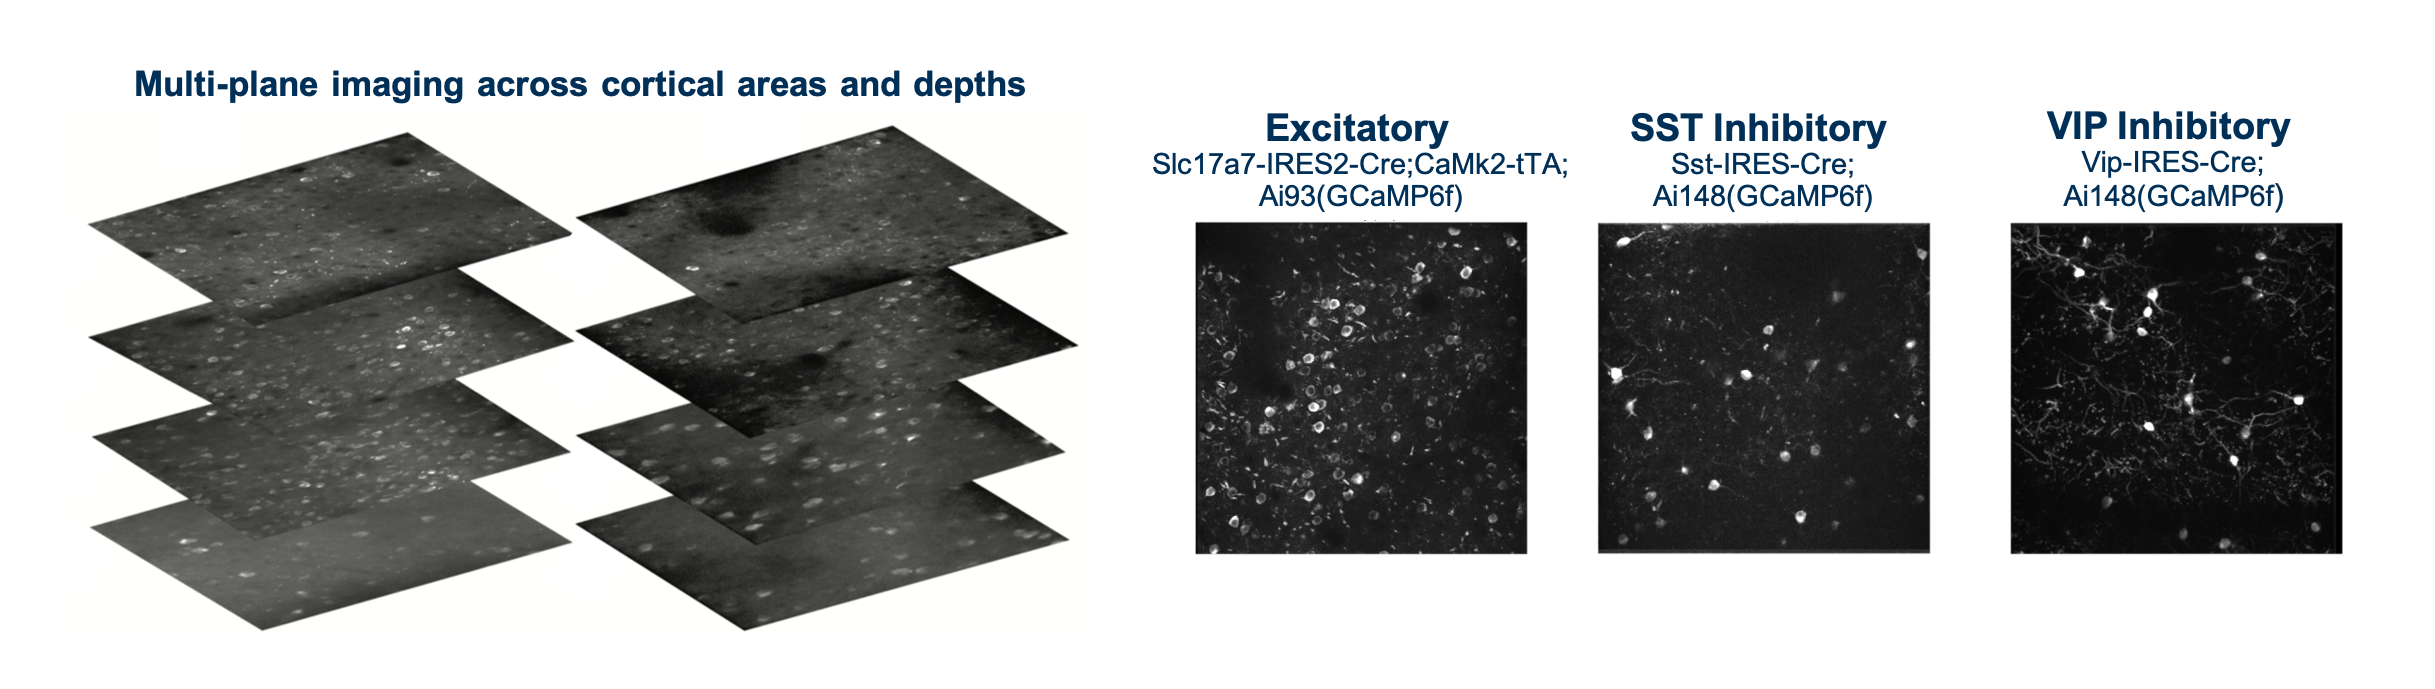

#### You can learn more about this dataset, behavioral task, and find other useful tools here:
#### [Overview page](https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html) and [Allen Brain Atlas](allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html)
#### This example will focus on the activity of the two inhibitory types - VIP and SST neurons.

# Loading the data

In [ ]:
# @title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet
!pip install  pyarrow # may be needed to read data file

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## For this example, we have pre-computed event triggered responses and saved them to figshare.
#### To access the full dataset, see `Allen_neuromatch_example_2.ipynb`, or go to the links at the bottom of this notebook
###This cell will download the responses.

In [ ]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

### Then we open it using the pandas `read_parquet` method


(parquet is just another file format)

In [ ]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

In [ ]:
data = data.sort_index()

#### The data is organized as a pandas dataframe.
#### Each row contains all data for a given cell on a given trial


In [ ]:
data.head(100)

stimulus_presentations_id  cell_specimen_id  \
85                           5        1086496689   
86                           5        1086501573   
87                           5        1086500533   
88                           5        1086497438   
89                           5        1086497908   
..                         ...               ...   
860                         50        1086498820   
861                         50        1086499316   
862                         50        1086499479   
863                         50        1086500121   
864                         50        1086499798   

                                                 trace  \
85   [0.06366926431655884, 0.002476318972185254, -0...   
86   [0.0637083426117897, 0.0919334813952446, -0.09...   
87   [0.0223990511149168, 0.22551870346069336, 0.11...   
88   [0.01795899122953415, 0.15271763503551483, 0.0...   
89   [0.059766266494989395, 0.03602207452058792, 0....   
..                                                 ...   
860  [0.012051858939230442, -0.09312691539525986, 0...   
861  [-0.015192230232059956, -0.004574302583932877,...   
862  [-0.1832532435655594, 0.12349186837673187, 0.0...   
863  [0.201486274600029, -0.07997290790081024, 0.00...   
864  [0.08591793477535248, 0.10472525656223297, 0.0...   

                                      trace_timestamps  mean_response  \
85   [-1.228133913303992, -1.1958145997959921, -1.1...       0.006115   
86   [-1.228133913303992, -1.1958145997959921, -1.1...      -0.018832   
87   [-1.228133913303992, -1.1958145997959921, -1.1...      -0.041275   
88   [-1.228133913303992, -1.1958145997959921, -1.1...       0.039527   
89   [-1.228133913303992, -1.1958145997959921, -1.1...      -0.006628   
..                                                 ...            ...   
860  [-1.228133913303992, -1.1958145997959921, -1.1...       0.022810   
861  [-1.228133913303992, -1.1958145997959921, -1.1...      -0.000194   
862  [-1.228133913303992, -1.1958145997959921, -1.1...       0.080105   
863  [-1.228133913303992, -1.1958145997959921, -1.1...      -0.017873   
864  [-1.228133913303992, -1.1958145997959921, -1.1...       0.021582   

     baseline_response image_name  image_index  is_change  omitted  ...  \
85           -0.084113      im075            2       True    False  ...   
86           -0.025578      im075            2       True    False  ...   
87           -0.032698      im075            2       True    False  ...   
88           -0.026750      im075            2       True    False  ...   
89           -0.039277      im075            2       True    False  ...   
..                 ...        ...          ...        ...      ...  ...   
860          -0.023483      im054            5       True    False  ...   
861          -0.001553      im054            5       True    False  ...   
862          -0.030166      im054            5       True    False  ...   
863          -0.028845      im054            5       True    False  ...   
864          -0.036990      im054            5       True    False  ...   

     ophys_session_id  ophys_container_id  behavior_session_id  \
85          994199725           991913453            994210659   
86          994199725           991913453            994210659   
87          994199725           991913453            994210659   
88          994199725           991913453            994210659   
89          994199725           991913453            994210659   
..                ...                 ...                  ...   
860         994199725           991913453            994210659   
861         994199725           991913453            994210659   
862         994199725           991913453            994210659   
863         994199725           991913453            994210659   
864         994199725           991913453            994210659   

                                     full_genotype  \
85   Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
86  


##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




### Let's check what is available


In [ ]:
print('exposure_levels:', data.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [ ]:
print('stimulus presentations can be changes:', data.is_change.unique())

stimulus presentations can be changes: [ True False]


In [ ]:
print('stimulus presentations can be omitted:', data.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [ ]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [ ]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [ ]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset


**Is the rate or geometry of representational drift different within a session (short timescale) versus between sessions (long timescale) in SST?**

**Drift rate:** How quickly the population vector moves away from its starting representation. Quantify as the Pearson correlation (ρ) between a reference activity vector and later activity vectors, convert it to a distance ( 1 – ρ )

**Drift geometry:** Whether the traces stay inside the same sub-space. Quantify as ...

**Steps:**
1. Within-session drift
- Loop through sessions
- Match trials to stimulus onset
- Take a reference (baseline)
- Rate: Compute correlation distance to that reference and plot versus elapsed time -> rate curve
- Geometry: ...

2. Between Session drift
- ...

In [ ]:
# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import pearsonr, linregress
sns.set_context("talk")

# Pull every SST row
sst_all = data[data.cre_line == "Sst-IRES-Cre"]

mouse2sessions_all = (
    sst_all[["mouse_id", "ophys_session_id"]]
      .drop_duplicates()
      .groupby("mouse_id")["ophys_session_id"]
      .apply(list)
)

print("Number of mice with SST cells recorded :", len(mouse2sessions_all))
print(mouse2sessions_all.head())

print("\nMouse | Session | #cells | #trials | #traces (=rows)")

results = []

# Loop through mouse and count traces and determine the drift (Bins = 30 )

for mouse, sess_list in mouse2sessions_all.items():
    for sid in sess_list:

        # dataframe for this session
        df_sess = sst_all[sst_all.ophys_session_id == sid]

        n_cells  = df_sess.cell_specimen_id.nunique()
        n_trials = df_sess.stimulus_presentations_id.nunique()
        n_rows   = len(df_sess)

        print(f"{mouse:<6} {sid:<12} {n_cells:<7} {n_trials:<8} {n_rows}")

        if n_trials < 30:
            continue

        # a. trial × cell matrix
        # Row = one trial’s population response (length = number of SST cells)
        # Column = response of the same cell across trials
        mat = (df_sess.groupby(["stimulus_presentations_id",
                                "cell_specimen_id"])["mean_response"]
                    .mean() # averages over trials -> 1 population vector per bin
                    .unstack("cell_specimen_id")
                    .sort_index())           # chronological order

        # b. split trial indices into 15 equal bins
        bins      = np.array_split(mat.index, 15)
        bin_vecs  = [mat.loc[idx].mean(0).values for idx in bins]

        # c. reference vector = mean of first 5 bins
        ref_vec   = np.vstack(bin_vecs[:5]).mean(0)

        # d. correlation-distance per bin
        dists = [1 - pearsonr(ref_vec, v)[0] for v in bin_vecs]

        # e. drift-rate proxy = slope of all bins
        slope, *_ = linregress(range(1, 16), dists)

        results.append({
            "mouse_id"        : mouse,
            "ophys_session_id": sid,
               "distances"       : dists,
            "slope"      : slope
        })

        # quick plot for the first session processed
        if len(results) == 1:
            plt.figure(figsize=(6,4))
            plt.plot(range(1,16), dists, marker='o')
            plt.axvspan(1,5, color="0.9")
            plt.xlabel("bin (chronological)")
            plt.ylabel("1 – ρ  (distance)")
            plt.title(f"Drift in session {sid}  (mouse {mouse})")
            plt.tight_layout()
            plt.show()

within_df = pd.DataFrame(results)
print("\nFinished; analysed", len(within_df), "sessions")
display(within_df.head()) "n_cells"         : n_cells,
            "n_trials"        : n_trials,


SyntaxError: invalid syntax (ipython-input-108-243978153.py, line 83)

In [ ]:
# Code per cell

# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import linregress
sns.set_context("talk")

# Pull every SST row
sst_all = data[data.cre_line == "Sst-IRES-Cre"]

mouse2sessions_all = (
    sst_all[["mouse_id", "ophys_session_id"]]
      .drop_duplicates()
      .groupby("mouse_id")["ophys_session_id"]
      .apply(list)
)

print("Number of mice with SST cells recorded :", len(mouse2sessions_all))

cell_records = []   # one dict per (cell, session)

for mouse, sess_list in mouse2sessions_all.items():
    for sid in sess_list:

        df_sess = sst_all[sst_all.ophys_session_id == sid]
        n_trials = df_sess.stimulus_presentations_id.nunique()
        if n_trials < 15:
            continue                        # need ≥15 trials for 15 bins

        # a. trial × cell matrix of mean_response
        mat = (df_sess.groupby(["stimulus_presentations_id",
                                "cell_specimen_id"])["mean_response"]
                   .mean()
                   .unstack("cell_specimen_id")
                   .sort_index())           # trials in chronological order

        # b. split trial indices into 15 bins
        bins = np.array_split(mat.index, 15)
        # (len(bins) == 15, each entry is an array of trial IDs)

        # c. per-cell baseline = mean of first 5 bins
        baseline = mat.loc[np.hstack(bins[:5])].mean(0)   # Series indexed by cell_id

        # d. per-cell Δ (absolute change) for each bin
        cell_ids = mat.columns
        bin_changes = []
        for idx in bins:
            bin_mean = mat.loc[idx].mean(0)               # Series per cell
            bin_changes.append((bin_mean - baseline).abs().values)  # 1D array len = n_cells
        # bin_changes = list of 15 arrays; stack to 15×n_cells
        changes = np.vstack(bin_changes)                  # shape (15, n_cells)

        # e. slope of change vs. bin for each cell
        x = np.arange(1, 16)                              # 1 … 15
        for j, cid in enumerate(cell_ids):
            slope, *_ = linregress(x, changes[:, j])

            cell_records.append({
                "mouse_id"        : mouse,
                "ophys_session_id": sid,
                "cell_specimen_id": cid,
                "slope_allbins"   : slope,
                "baseline_df_f"   : baseline.loc[cid],
                "n_trials"        : n_trials
            })

# Assemble tidy DataFrame
cell_df = pd.DataFrame(cell_records)
print("\nFinished; analysed", len(cell_df), "cell-sessions")
display(cell_df.head())

# Choose a session to plot  (edit this ID or pick the first in cell_df)

session_to_plot = cell_df["ophys_session_id"].iloc[0]   # first one in table
mouse_ids_in_session = cell_df.loc[
    cell_df.ophys_session_id == session_to_plot, "mouse_id"
].unique()

print(f"Plotting all cells from session {session_to_plot} "
      f"(mice in session: {mouse_ids_in_session})")


# 15-bin change matrix for that session
df_sess = sst_all[sst_all.ophys_session_id == session_to_plot]

# trial × cell matrix
mat = (df_sess.groupby(["stimulus_presentations_id", "cell_specimen_id"])
               ["mean_response"].mean().unstack("cell_specimen_id").sort_index())

bins        = np.array_split(mat.index, 15)
baseline    = mat.loc[np.hstack(bins[:5])].mean(0)

bin_changes = []
for idx in bins:
    bin_mean = mat.loc[idx].mean(0)
    bin_changes.append((bin_mean - baseline).abs())       # pandas Series per cell

# stack → DataFrame: rows = bins 1…15, cols = cell IDs
change_mat = pd.DataFrame(bin_changes, index=np.arange(1,16)).T


# set up a colour for each mouse present in this session
palette = dict(zip(
    mouse_ids_in_session,
    sns.color_palette("husl", len(mouse_ids_in_session))
))

cell2mouse = df_sess.drop_duplicates("cell_specimen_id")\
                    .set_index("cell_specimen_id")["mouse_id"]

# Plot every cell’s drift curve, coloured by mouse
plt.figure(figsize=(7,4))
for cid, series in change_mat.iterrows():
    mouse = cell2mouse.loc[cid]
    plt.plot(change_mat.columns, series, lw=1,
             color=palette[mouse], alpha=0.8)

plt.axvspan(1,5, color="0.9")     # highlight baseline bins
plt.xlabel("bin (chronological)")
plt.ylabel("Drift")
# build a legend from the mouse-colour mapping
handles = [plt.Line2D([0],[0], color=c, lw=3) for c in palette.values()]
plt.legend(handles, [f"mouse {m}" for m in palette.keys()],
           title="mouse ID", frameon=False, bbox_to_anchor=(1.02,1),
           loc="upper left")
plt.tight_layout()
plt.show()

Within a mouse between two sessions, data selected:
- Familiar images
- SST
- V1
- Depth
- Session: OPHYS_3_images_B

shape (rows, columns): (25380, 31)
unique mice : 7
unique sessions : 8
unique cells : 96
Mouse 476970, sessions 994199725, 994731371
10 cells imaged in both sessions


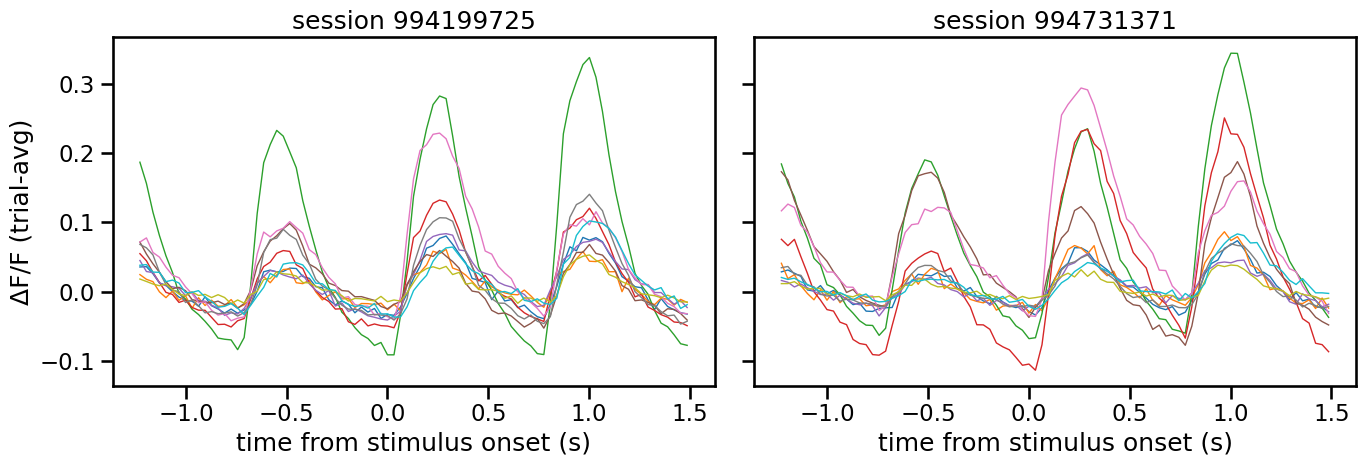

In [ ]:
# Select the data, one mouse & two sessions
sst_data_2 = data[
    (data.cre_line           == "Sst-IRES-Cre") &
    (data.omitted            == False) &
    (data.exposure_level     == "familiar") &
    (data.targeted_structure == "VISp") &
    (data.session_type       == "OPHYS_3_images_B")
]

print("shape (rows, columns):", sst_data_2.shape)
print("unique mice :", sst_data_2.mouse_id.nunique())
print("unique sessions :", sst_data_2.ophys_session_id.nunique())
print("unique cells :", sst_data_2.cell_specimen_id.nunique())

# Find mouse with two sessions
mice_with_two = (
    sst_data_2.groupby("mouse_id")["ophys_session_id"]
              .nunique()
              .loc[lambda x: x >= 2]
              .index
)
assert len(mice_with_two) > 0, "No mouse in this data-slice has ≥2 sessions."

mouse_id = mice_with_two[0]
mouse_df = sst_data_2[sst_data_2.mouse_id == mouse_id]
sessions  = sorted(mouse_df.ophys_session_id.unique())[:2]
sess_a, sess_b = sessions
print(f"Mouse {mouse_id}, sessions {sess_a}, {sess_b}")

# Trial- averaged trace per cell, per session

def mean_trace_by_cell(session_id):
    tmp = mouse_df[mouse_df.ophys_session_id == session_id]
    traces = (tmp.groupby("cell_specimen_id")["trace"]
                  .apply(lambda x: np.stack(x).mean(0)))
    return traces        # pandas Series: index=cell_id, value=np.array(trace)

traces_a = mean_trace_by_cell(sess_a)
traces_b = mean_trace_by_cell(sess_b)

# keep cells recorded in both sessions
common_cells = traces_a.index.intersection(traces_b.index)
traces_a = traces_a.loc[common_cells]
traces_b = traces_b.loc[common_cells]
print(f"{len(common_cells)} cells imaged in both sessions")

# Plot traces per cell per session
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set_context("talk")

t = mouse_df.trace_timestamps.iloc[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, traces, sid in zip(axes, [traces_a, traces_b], sessions):
    for tr in traces:
        ax.plot(t, tr, lw=1)
    ax.set_title(f"session {sid}")
    ax.set_xlabel("time from stimulus onset (s)")
axes[0].set_ylabel("ΔF/F (trial-avg)")
plt.tight_layout()
plt.show()

In [ ]:
image_names=sst_data_2.image_name.unique()

In [ ]:
print(sst_data_2.image_name[0:100])

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.stripplot(x=sst_data_2.stimulus_presentations_id, y=sst_data_2['image_name'], jitter=True)
plt.xlabel('row Index')
plt.ylabel('Image Name')
plt.title('order of image appearance')
plt.tight_layout()
plt.show()

In [ ]:
print(sst_data_2.is_change.unique())

Does the omission response correlate with behavior?

How do the dynamics of image and omission evoked activity change over time during the novel image session?

### To learn how to use the AllenSDK to access the full dataset, and see more in depth examples of how to interact with the data, check out the additional tutorials here:

https://colab.research.google.com/drive/163dPehppRK6JeHypgfB3gyaGQqKshNQc?usp=sharing

and in the 'Getting Started' section here:

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html




In [ ]:
#how many cells recorded per each image?
image_names = sst_data_2.image_name.unique()

# Dictionary to hold DataFrames
image_dfs = {}

for name in image_names:
    image_dfs[name] = sst_data_2[sst_data_2.image_name == name]
    print(f"{name}: {image_dfs[name].shape}")


im054: (3174, 33)
im000: (3150, 33)
im073: (3129, 33)
im075: (3170, 33)
im045: (3228, 33)
im106: (3206, 33)
im035: (3121, 33)
im031: (3202, 33)


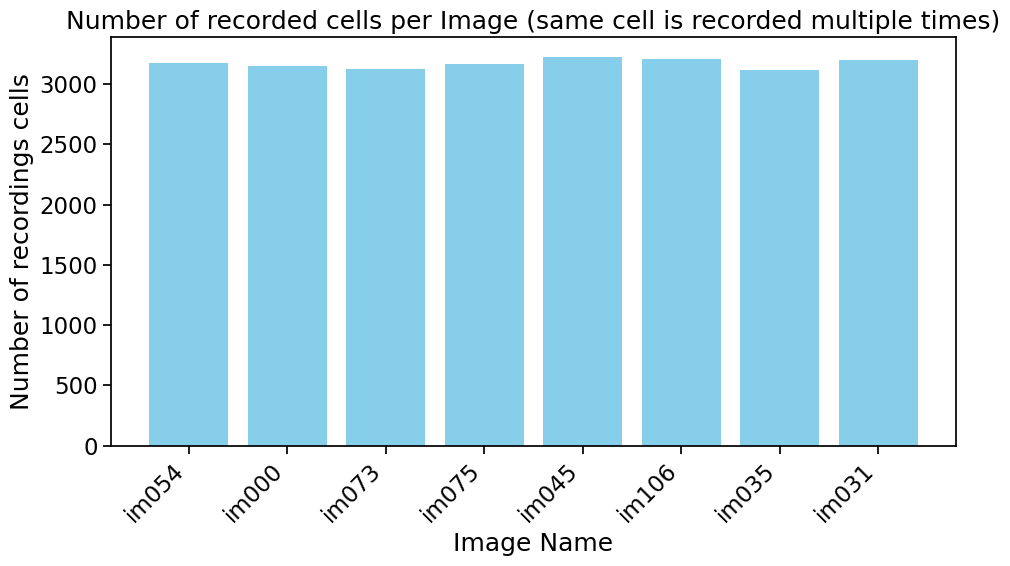

In [ ]:
import matplotlib.pyplot as plt

# Create lists for plotting
x = list(image_dfs.keys())
y = [df.shape[0] for df in image_dfs.values()]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Image Name')
plt.ylabel('Number of recordings cells')
plt.title('Number of recorded cells per Image (same cell is recorded multiple times)')
plt.xticks(rotation=45, ha='right')  # Rotate x labels if needed
plt.tight_layout()
plt.show()


im000: (218, 33)
im031: (226, 33)
im035: (219, 33)
im045: (223, 33)
im054: (226, 33)
im073: (218, 33)
im075: (221, 33)
im106: (221, 33)


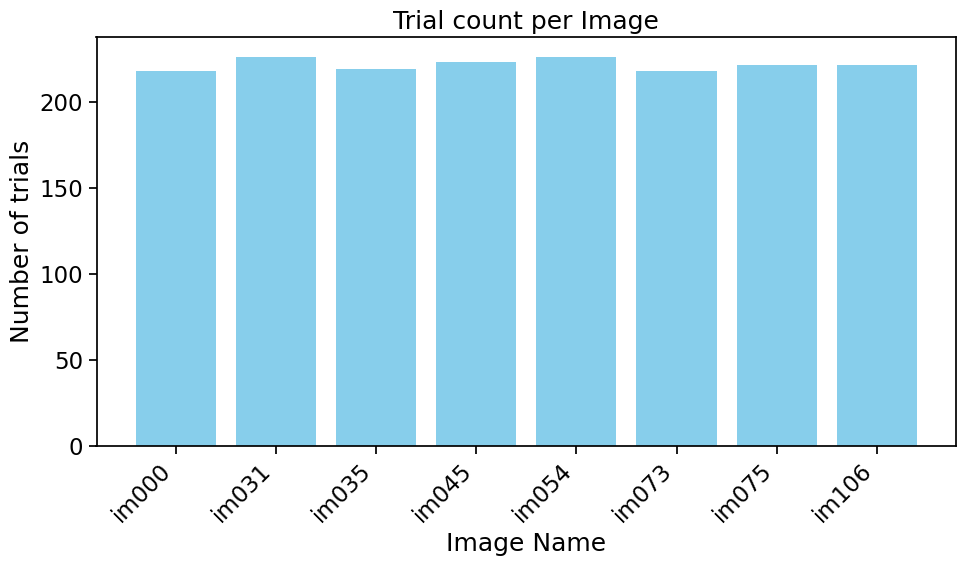

In [ ]:
image_names = sst_data_2.image_name.unique()

image_dfs = {}

for name in image_names:
    # Filter rows by image_name
    df_img = sst_data_2[sst_data_2.image_name == name]

    # Drop duplicates based on stimulus_presentations_id (keep first occurrence)
    df_unique = df_img.drop_duplicates(subset='stimulus_presentations_id')

    image_dfs[name] = df_unique
    print(f"{name}: {df_unique.shape}")

import matplotlib.pyplot as plt

# Create lists for plotting
x = list(image_dfs.keys())
y = [df.shape[0] for df in image_dfs.values()]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Image Name')
plt.ylabel('Number of trials')
plt.title('Trial count per Image')
plt.xticks(rotation=45, ha='right')  # Rotate x labels if needed
plt.tight_layout()
plt.show()


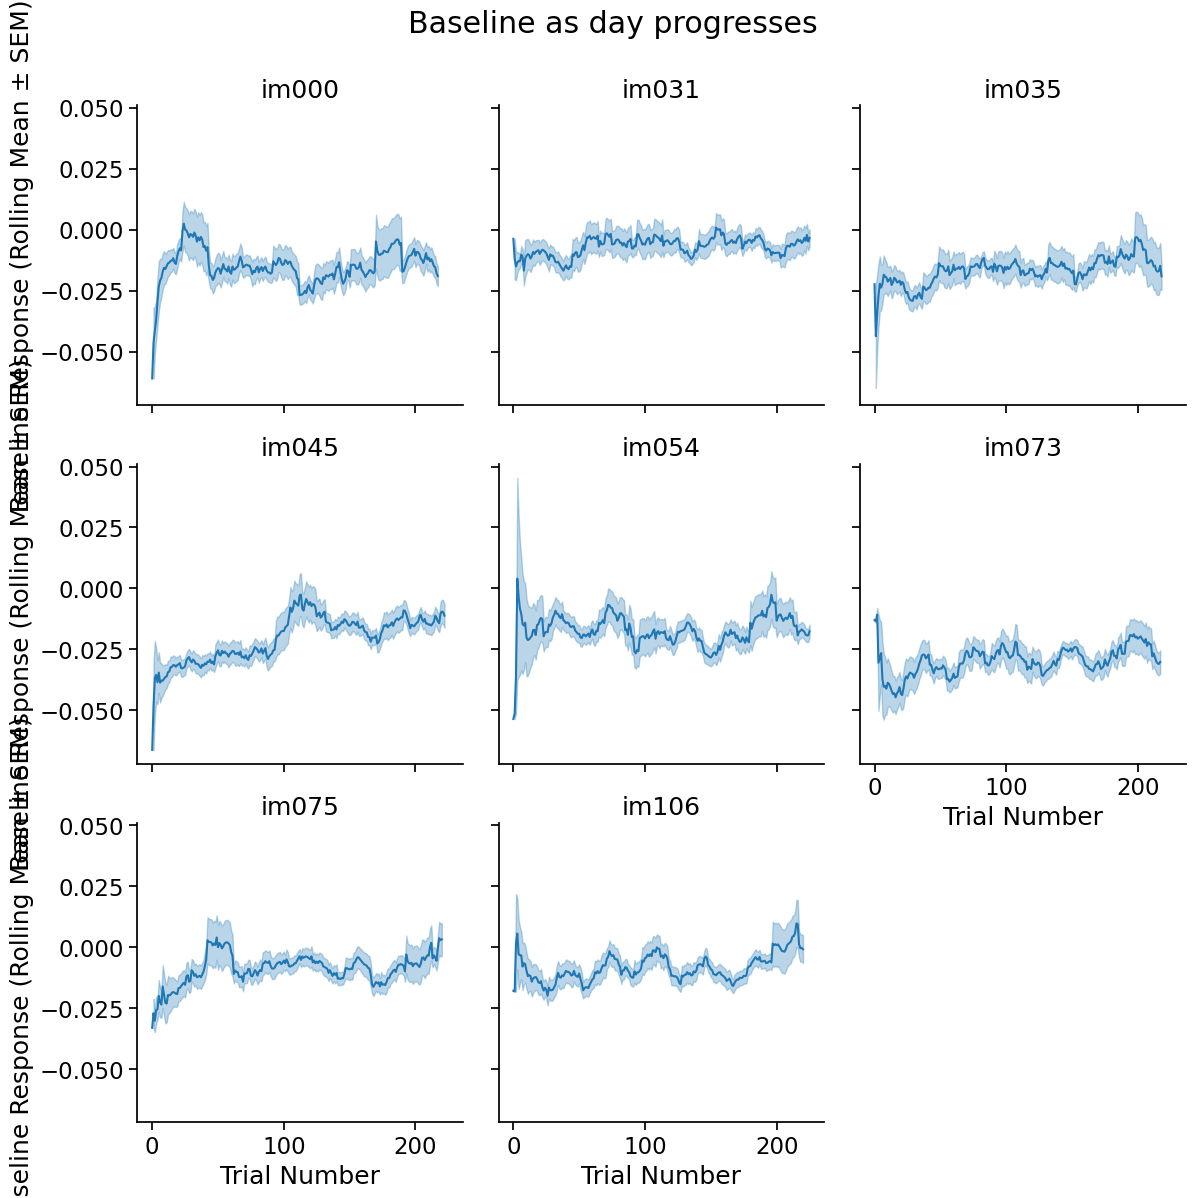

In [ ]:
# bleaching?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Average per stimulus_presentations_id
agg_df = (
    sst_data_2
    .groupby(['stimulus_presentations_id', 'image_name'], as_index=False)
    .agg({
        'mean_response': 'mean',
        'baseline_response': 'mean'
    })
)

# Step 2: Use only baseline response
agg_df['delta_response'] = agg_df['baseline_response']

# Step 3: Sort and assign trial number
agg_df = agg_df.sort_values(['image_name', 'stimulus_presentations_id'])
agg_df['trial_number'] = agg_df.groupby('image_name').cumcount()

# Step 4: Compute rolling mean and SEM
def rolling_stats(df, window=20):
    df = df.copy()
    df['rolling_mean'] = df['delta_response'].rolling(window=window, min_periods=1).mean()
    df['rolling_sem'] = df['delta_response'].rolling(window=window, min_periods=1).apply(
        lambda x: x.std(ddof=1) / np.sqrt(len(x)), raw=False)
    return df

rolling_df = agg_df.groupby('image_name', group_keys=False).apply(rolling_stats)

# Step 5: Plot with shaded SEM using FacetGrid
g = sns.FacetGrid(rolling_df, col="image_name", col_wrap=3, height=4, sharey=True)

def plot_with_shade(data, color, **kwargs):
    x = data['trial_number']
    y = data['rolling_mean']
    sem = data['rolling_sem']
    plt.plot(x, y, color=color)
    plt.fill_between(x, y - sem, y + sem, color=color, alpha=0.3)

g.map_dataframe(plot_with_shade)

# Final touches
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Trial Number", "Baseline Response (Rolling Mean ± SEM)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Baseline as day progresses")
plt.show()


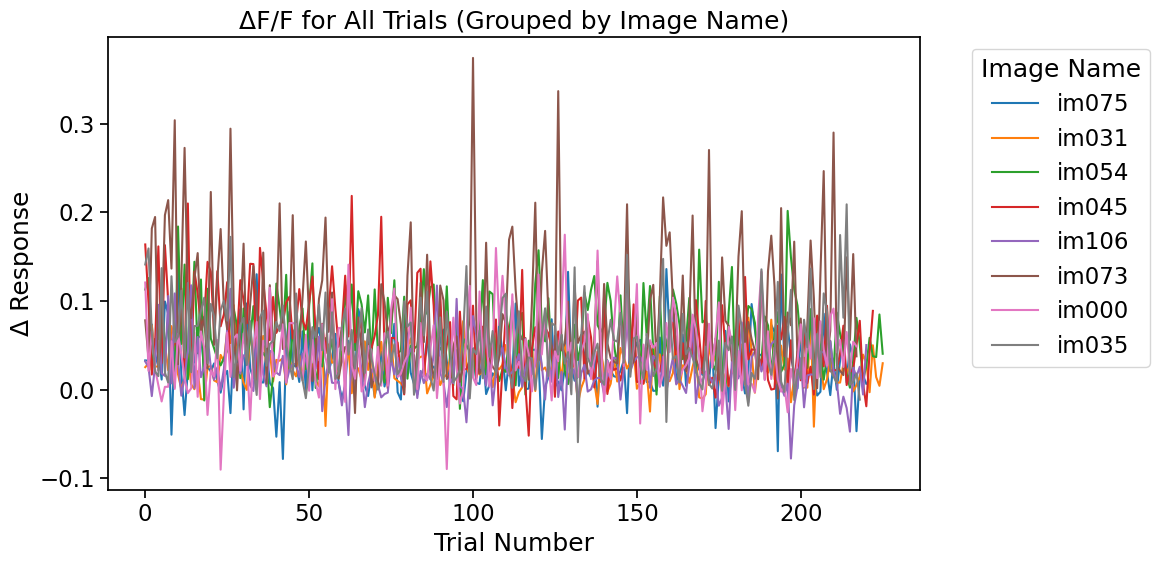

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Average per stimulus_presentations_id
agg_df = (
    sst_data_2
    .groupby(['stimulus_presentations_id', 'image_name'], as_index=False)
    .agg({
        'mean_response': 'mean',
        'baseline_response': 'mean'
    })
)

# Step 2: Compute Δ response
agg_df['delta_response'] = agg_df['mean_response'] - agg_df['baseline_response']

# Step 3: Add trial index (just to plot x-axis meaningfully)
agg_df['trial_number'] = agg_df.groupby('image_name').cumcount()

# Step 4: Plot all trials
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_df, x='trial_number', y='delta_response', hue='image_name', marker=None)
plt.title('ΔF/F for All Trials (Grouped by Image Name)')
plt.xlabel('Trial Number')
plt.ylabel('Δ Response')
plt.legend(title='Image Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


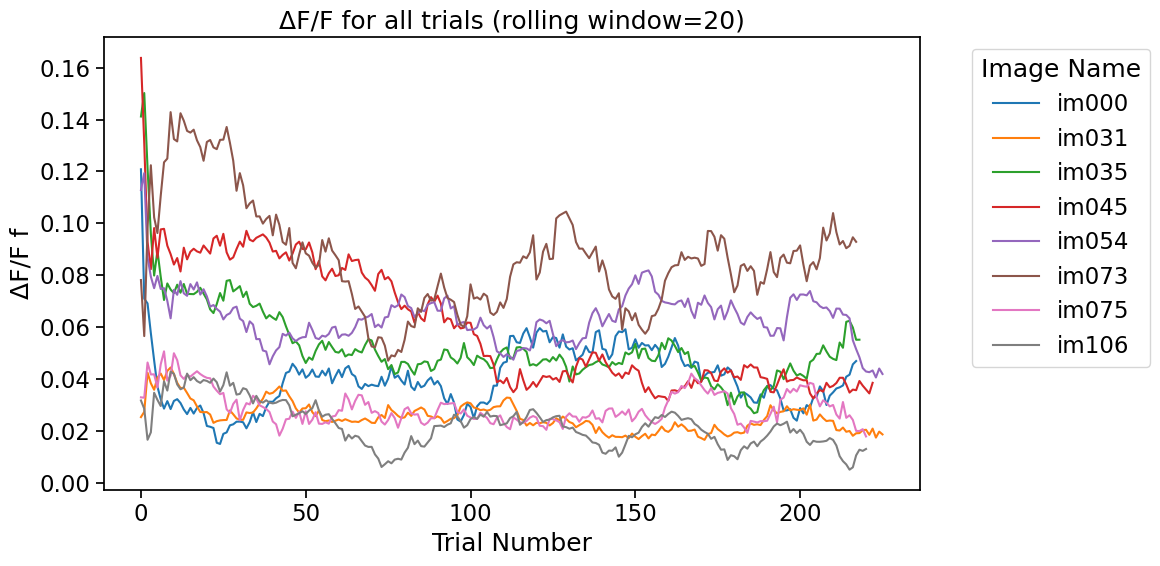

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Average per stimulus_presentations_id
agg_df = (
    sst_data_2
    .groupby(['stimulus_presentations_id', 'image_name'], as_index=False)
    .agg({
        'mean_response': 'mean',
        'baseline_response': 'mean'
    })
)

# Step 2: Compute Δ response
agg_df['delta_response'] = agg_df['mean_response'] - agg_df['baseline_response']

# Step 3: Sort and assign trial number per image_name
agg_df = agg_df.sort_values(['image_name', 'stimulus_presentations_id'])
agg_df['trial_number'] = agg_df.groupby('image_name').cumcount()

# Step 4: Compute rolling average
agg_df['rolling_delta'] = (
    agg_df.groupby('image_name')['delta_response']
    .transform(lambda x: x.rolling(window=20, min_periods=1).mean())
)

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_df, x='trial_number', y='rolling_delta', hue='image_name')
plt.title('ΔF/F for all trials (rolling window=20)')
plt.xlabel('Trial Number')
plt.ylabel('ΔF/F f')
plt.legend(title='Image Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


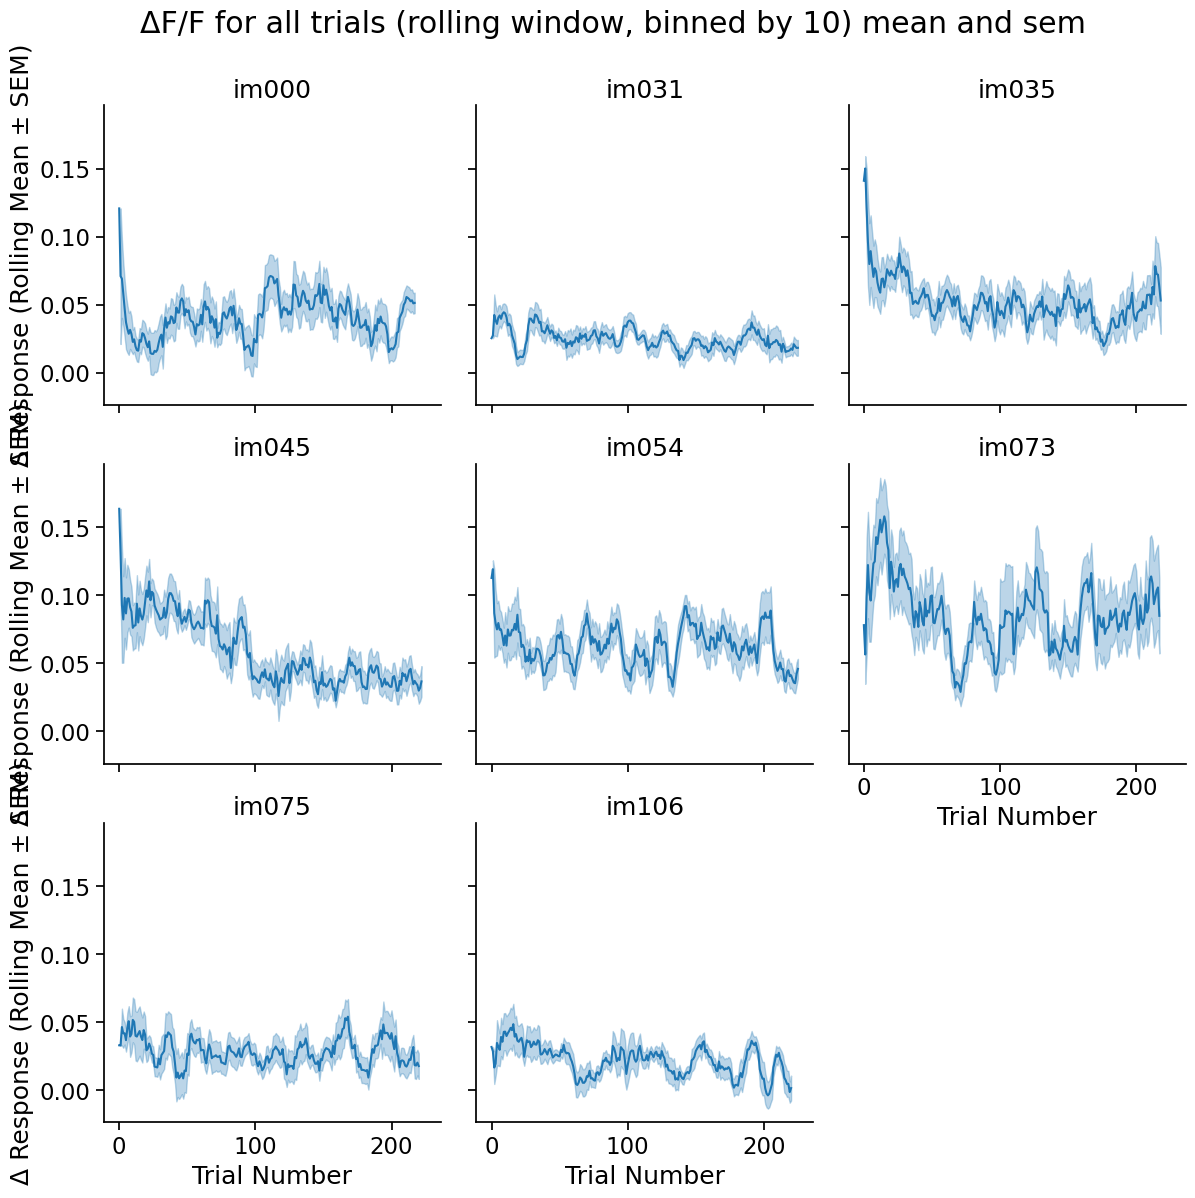

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Average per stimulus_presentations_id
agg_df = (
    sst_data_2
    .groupby(['stimulus_presentations_id', 'image_name'], as_index=False)
    .agg({
        'mean_response': 'mean',
        'baseline_response': 'mean'
    })
)

# Step 2: Δ response
agg_df['delta_response'] = agg_df['mean_response'] - agg_df['baseline_response']

# Step 3: Sort and assign trial number
agg_df = agg_df.sort_values(['image_name', 'stimulus_presentations_id'])
agg_df['trial_number'] = agg_df.groupby('image_name').cumcount()

# Step 4: Compute rolling mean and SEM
def rolling_stats(df, window=10):
    df = df.copy()
    df['rolling_mean'] = df['delta_response'].rolling(window=window, min_periods=1).mean()
    df['rolling_sem'] = df['delta_response'].rolling(window=window, min_periods=1).apply(
        lambda x: x.std(ddof=1) / np.sqrt(len(x)), raw=False)
    return df

rolling_df = agg_df.groupby('image_name', group_keys=False).apply(rolling_stats)

# Step 5: Plot with shaded SEM using FacetGrid
g = sns.FacetGrid(rolling_df, col="image_name", col_wrap=3, height=4, sharey=True)

def plot_with_shade(data, color, **kwargs):
    x = data['trial_number']
    y = data['rolling_mean']
    sem = data['rolling_sem']
    plt.plot(x, y, color=color)
    plt.fill_between(x, y - sem, y + sem, color=color, alpha=0.3)

g.map_dataframe(plot_with_shade)

# Final touches
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Trial Number", "Δ Response (Rolling Mean ± SEM)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("ΔF/F for all trials (rolling window, binned by 10) mean and sem")
plt.show()


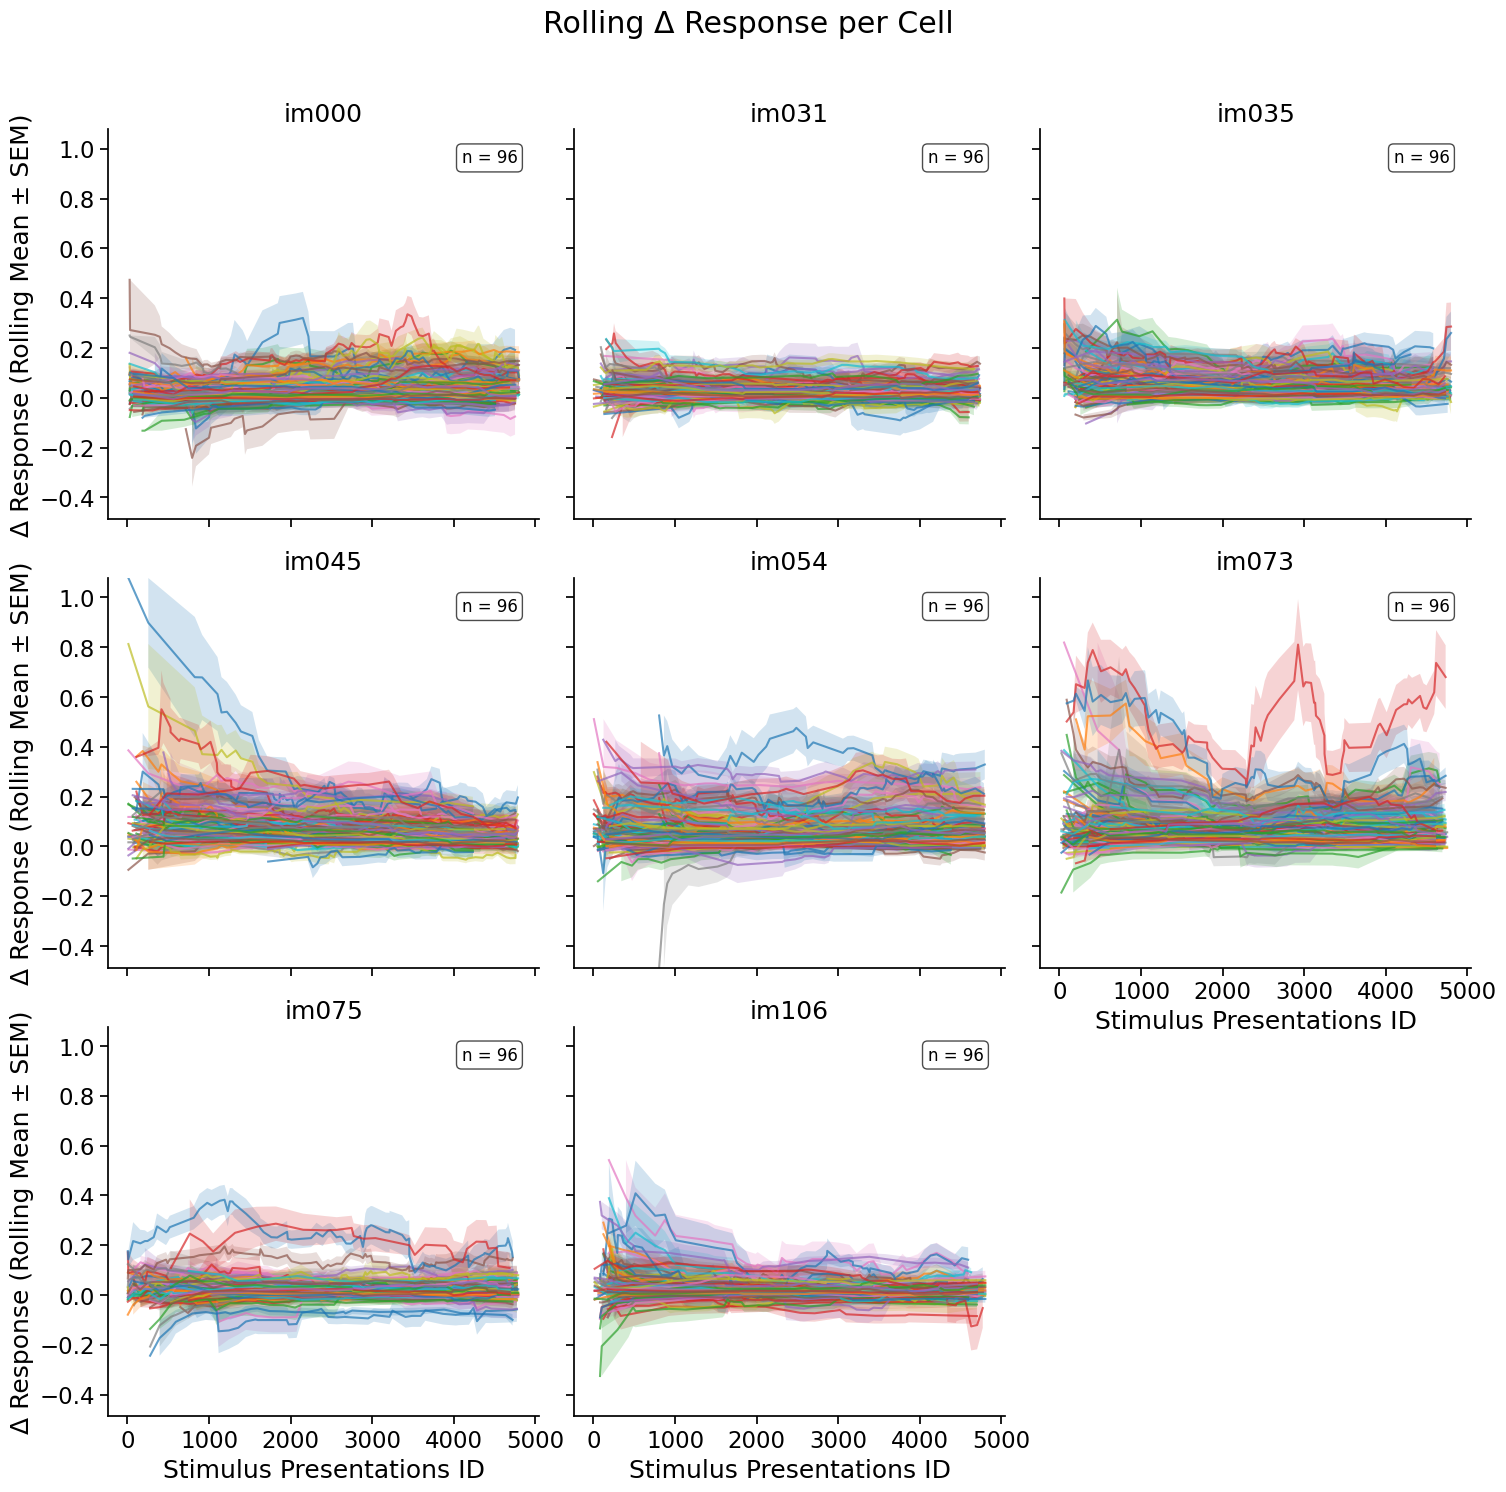

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Calculate delta response
sst_data_2['delta_response'] = sst_data_2['mean_response'] - sst_data_2['baseline_response']

# Step 2: Sort for consistent ordering
sst_data_2 = sst_data_2.sort_values(['image_name', 'cell_specimen_id', 'stimulus_presentations_id'])

# Step 3: Compute rolling stats per image + cell, based on actual stimulus IDs
def rolling_cell_stats(df, window=10):
    df = df.copy()
    df['rolling_mean'] = df['delta_response'].rolling(window=window, min_periods=1).mean()
    df['rolling_sem'] = df['delta_response'].rolling(window=window, min_periods=1).apply(
        lambda x: x.std(ddof=1) / np.sqrt(len(x)), raw=False)
    return df

rolling_df = sst_data_2.groupby(['image_name', 'cell_specimen_id'], group_keys=False).apply(rolling_cell_stats)

# Calculate global y-axis limits
y_min = (rolling_df['rolling_mean'] - rolling_df['rolling_sem']).min()
y_max = (rolling_df['rolling_mean'] + rolling_df['rolling_sem']).max()

# Count unique cells per image_name
cell_counts = rolling_df.groupby('image_name')['cell_specimen_id'].nunique()

# Step 4: Plot using stimulus_presentations_id as x-axis with shared y-axis limits
g = sns.FacetGrid(rolling_df, col="image_name", col_wrap=3, height=5, sharey=True)

def plot_cells(data, color, **kwargs):
    for cell_id, df_cell in data.groupby('cell_specimen_id'):
        x = df_cell['stimulus_presentations_id']
        y = df_cell['rolling_mean']
        sem = df_cell['rolling_sem']
        plt.plot(x, y, label=cell_id, alpha=0.7)
        plt.fill_between(x, y - sem, y + sem, alpha=0.2)

g.map_dataframe(plot_cells)

# Set y-axis limits and add n= count text
for ax, (image_name, n_cells) in zip(g.axes.flatten(), cell_counts.items()):
    ax.set_ylim(y_min, y_max)
    # Add text at upper right corner inside the plot
    ax.text(
        0.95, 0.95, f'n = {n_cells}',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
    )

# Optional: legend (commented out to avoid clutter)
#g.axes[0].legend(title='Cell ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Final touches
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Stimulus Presentations ID", "Δ Response (Rolling Mean ± SEM)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Rolling Δ Response per Cell")
plt.show()


In [ ]:
#how many cells there is?
image_names = sst_data_2.image_name.unique()

# Dictionary to hold DataFrames and unique cell counts
image_dfs = {}
unique_cell_counts = {}

for name in image_names:
    df = sst_data_2[sst_data_2.image_name == name]
    image_dfs[name] = df
    unique_cells = df['cell_specimen_id'].nunique()
    unique_cell_counts[name] = unique_cells
    print(f"{name}: {df.shape}, Unique cells: {unique_cells}")


im000: (3150, 33), Unique cells: 96
im031: (3202, 33), Unique cells: 96
im035: (3121, 33), Unique cells: 96
im045: (3228, 33), Unique cells: 96
im054: (3174, 33), Unique cells: 96
im073: (3129, 33), Unique cells: 96
im075: (3170, 33), Unique cells: 96
im106: (3206, 33), Unique cells: 96


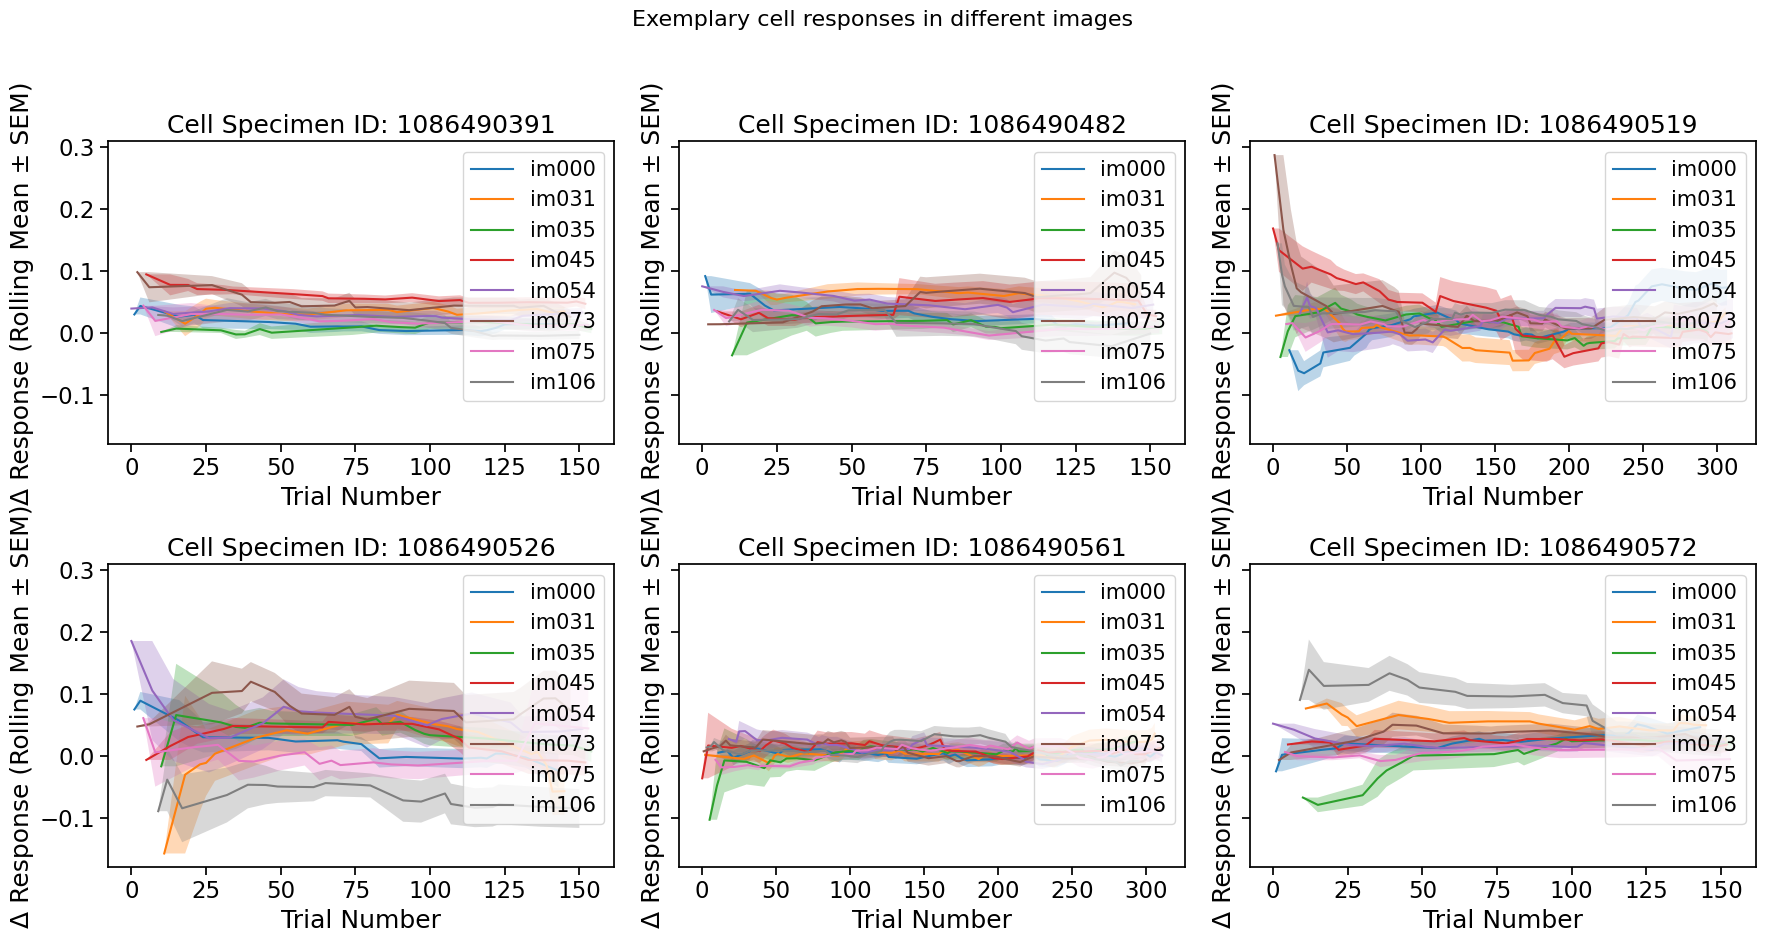

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 0: ensure delta_response exists
sst_data_2['delta_response'] = sst_data_2['mean_response'] - sst_data_2['baseline_response']

# Step 1: Sort and assign global trial_number per cell
sst_data_2 = sst_data_2.sort_values(['cell_specimen_id', 'stimulus_presentations_id'])
sst_data_2['trial_number'] = sst_data_2.groupby('cell_specimen_id').cumcount()

# Step 2: Pick first 6 cells
first_6_cells = sst_data_2['cell_specimen_id'].unique()[:6]

# Step 3: Rolling stats function (no local trial index)
def rolling_stats(df, window=10):
    df = df.copy()
    df['rolling_mean'] = df['delta_response'].rolling(window=window, min_periods=1).mean()
    df['rolling_sem'] = df['delta_response'].rolling(window=window, min_periods=1).apply(
        lambda x: x.std(ddof=1)/np.sqrt(len(x)) if len(x)>1 else 0,
        raw=False
    )
    return df

# Step 4: Plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for ax, cell_id in zip(axes, first_6_cells):
    cell_df = sst_data_2[sst_data_2['cell_specimen_id'] == cell_id]

    # Compute rolling stats per image
    rolling_cell = cell_df.groupby('image_name', group_keys=False).apply(rolling_stats)

    # Plot each image
    for image_name, df_img in rolling_cell.groupby('image_name'):
        ax.plot(df_img['trial_number'], df_img['rolling_mean'], label=image_name)
        ax.fill_between(
            df_img['trial_number'],
            df_img['rolling_mean'] - df_img['rolling_sem'],
            df_img['rolling_mean'] + df_img['rolling_sem'],
            alpha=0.3
        )

    ax.set_title(f'Cell Specimen ID: {cell_id}')
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Δ Response (Rolling Mean ± SEM)')
    ax.legend(fontsize='small', loc='upper right')

plt.suptitle('Exemplary cell responses for different images', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
